In [1]:
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# DAU

### 추가데이터 dau

In [2]:
import pandas as pd

# 경로 설정
file_path = "gs://codeit-project/hackle/merged_df_final.parquet"
key_path = "/home/leesh/codeit_project/codeit-project-docker/config/key.json"

# GCS에서 parquet 불러오기
df = pd.read_parquet(file_path, storage_options={"token": key_path})

# 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 55770129 entries, 0 to 2878667
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   device_id       object        
 2   event_key       object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ GB
None


In [3]:
df['date'] = df['event_datetime'].dt.date
df.head()

,event_datetime,device_id,event_key,date
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae,button,2023-05-01
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796,button,2023-05-01
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff,button,2023-05-01
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a,button,2023-05-01
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c,button,2023-05-01


In [4]:
dau = df.groupby('date')['device_id'].nunique().reset_index(name='DAU')

In [5]:
dau.tail()

,date,DAU
68,2023-07-08,36374
69,2023-07-09,35737
70,2023-07-10,31562
71,2023-07-11,28497
72,2023-07-12,32476


In [15]:
dau.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/dau.parquet", engine="pyarrow", compression="snappy")

### 기본데이터 dau

In [16]:
# 경로 설정
file_path = "gs://codeit-project/hackle/final.parquet"
key_path = "/home/leesh/codeit_project/codeit-project-docker/config/key.json"

# GCS에서 parquet 불러오기
hackle_events = pd.read_parquet(file_path, storage_options={"token": key_path})

# 확인
print(hackle_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11406944 entries, 0 to 11406943
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   friend_count    float64       
 5   question_id     float64       
 6   heart_balance   float64       
 7   id              int64         
 8   user_id         object        
 9   device_id       object        
 10  osname          object        
 11  osversion       object        
dtypes: datetime64[ms](1), float64(3), int64(1), object(7)
memory usage: 1.0+ GB
None


In [17]:
hackle_events.head()

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


In [18]:
hackle_events = hackle_events.drop(columns=['session_id','friend_count','question_id','heart_balance','event_id','device_id'])
hackle_events.head()

,event_datetime,event_key,id,user_id,osname,osversion
0,2023-07-18 19:40:17,$session_start,367093,1041414,iOS,16.0
1,2023-07-31 19:11:51,click_notice_detail,367093,1041414,iOS,16.0
2,2023-07-31 19:14:34,click_question_open,367093,1041414,iOS,16.0
3,2023-07-31 19:13:18,click_question_open,367093,1041414,iOS,16.0
4,2023-07-31 19:12:50,click_question_open,367093,1041414,iOS,16.0


In [19]:
hackle_events['date'] = hackle_events['event_datetime'].dt.date

In [20]:
hackle_events.head()

,event_datetime,event_key,id,user_id,osname,osversion,date
0,2023-07-18 19:40:17,$session_start,367093,1041414,iOS,16.0,2023-07-18
1,2023-07-31 19:11:51,click_notice_detail,367093,1041414,iOS,16.0,2023-07-31
2,2023-07-31 19:14:34,click_question_open,367093,1041414,iOS,16.0,2023-07-31
3,2023-07-31 19:13:18,click_question_open,367093,1041414,iOS,16.0,2023-07-31
4,2023-07-31 19:12:50,click_question_open,367093,1041414,iOS,16.0,2023-07-31


In [21]:
dau2 = hackle_events.groupby('date')['user_id'].nunique().reset_index(name='DAU')

In [22]:
dau2.head()

,date,DAU
0,2023-07-18,36555
1,2023-07-19,27674
2,2023-07-20,39637
3,2023-07-21,40478
4,2023-07-22,25937


In [24]:
dau2.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/dau2.parquet", engine="pyarrow", compression="snappy")

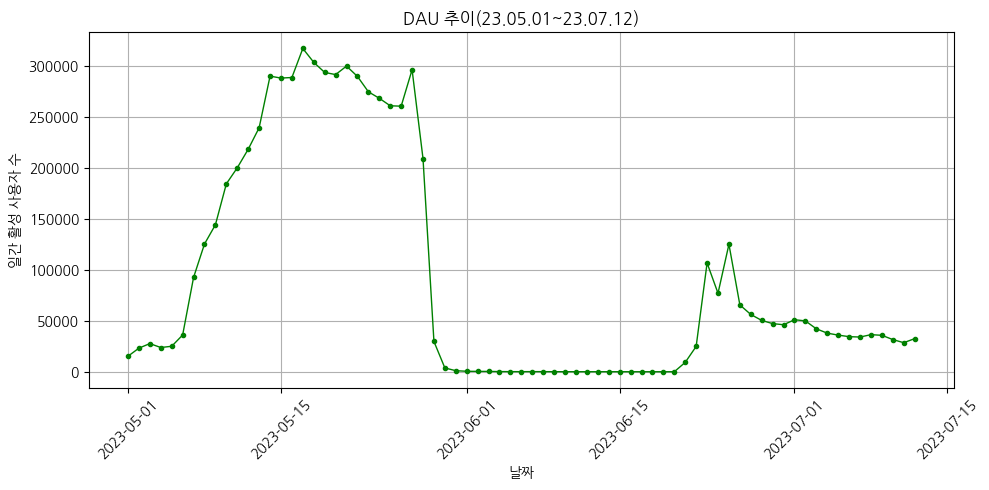

In [25]:
import pandas as pd
import matplotlib.pyplot as plt\

dau = pd.read_parquet('/home/leesh/codeit_project/codeit-project-docker/parquet/dau.parquet')

# 날짜 형식 변환
dau["date"] = pd.to_datetime(dau["date"])

# 시계열 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(
    dau["date"],
    dau["DAU"],
    color='green',       # 선 색상: 초록색
    marker='o',          # 점 모양
    markersize=3,        # 점 크기
    linewidth=1          # 선 두께
)
plt.title("DAU 추이(23.05.01~23.07.12)")
plt.xlabel("날짜")
plt.ylabel("일간 활성 사용자 수")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
print(dau2['date'].min())
print(dau2['date'].max())

2023-07-18
2023-08-10


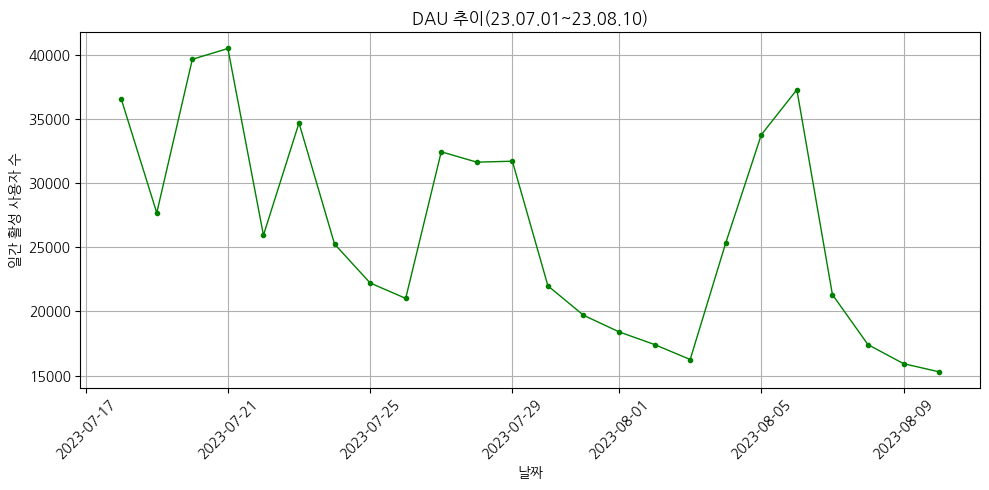

In [27]:
# 날짜 형식 변환
dau2["date"] = pd.to_datetime(dau2["date"])

# 시계열 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(
    dau2["date"],
    dau2["DAU"],
    color='green',       # 선 색상: 초록색
    marker='o',          # 점 모양
    markersize=3,        # 점 크기
    linewidth=1          # 선 두께
)
plt.title("DAU 추이(23.07.01~23.08.10)")
plt.xlabel("날짜")
plt.ylabel("일간 활성 사용자 수")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 전체기간 dau

In [28]:
total_dau = pd.concat([dau,dau2])
display(total_dau)

,date,DAU
0,2023-05-01,15242
1,2023-05-02,23176
2,2023-05-03,27625
3,2023-05-04,23758
4,2023-05-05,25006
...,...,...
19,2023-08-06,37269
20,2023-08-07,21308
21,2023-08-08,17411
22,2023-08-09,15929


In [29]:
total_dau['date'].unique()

<DatetimeArray>
['2023-05-01 00:00:00', '2023-05-02 00:00:00', '2023-05-03 00:00:00',
 '2023-05-04 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-08 00:00:00', '2023-05-09 00:00:00',
 '2023-05-10 00:00:00', '2023-05-11 00:00:00', '2023-05-12 00:00:00',
 '2023-05-13 00:00:00', '2023-05-14 00:00:00', '2023-05-15 00:00:00',
 '2023-05-16 00:00:00', '2023-05-17 00:00:00', '2023-05-18 00:00:00',
 '2023-05-19 00:00:00', '2023-05-20 00:00:00', '2023-05-21 00:00:00',
 '2023-05-22 00:00:00', '2023-05-23 00:00:00', '2023-05-24 00:00:00',
 '2023-05-25 00:00:00', '2023-05-26 00:00:00', '2023-05-27 00:00:00',
 '2023-05-28 00:00:00', '2023-05-29 00:00:00', '2023-05-30 00:00:00',
 '2023-05-31 00:00:00', '2023-06-01 00:00:00', '2023-06-02 00:00:00',
 '2023-06-03 00:00:00', '2023-06-04 00:00:00', '2023-06-05 00:00:00',
 '2023-06-06 00:00:00', '2023-06-07 00:00:00', '2023-06-08 00:00:00',
 '2023-06-09 00:00:00', '2023-06-10 00:00:00', '2023-06-11 00:00:00',
 '20

7월 13일 - 7월 17일까지 데이터 없음

In [30]:
total_dau.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/total_dau.parquet", engine="pyarrow", compression="snappy")

### 시각화

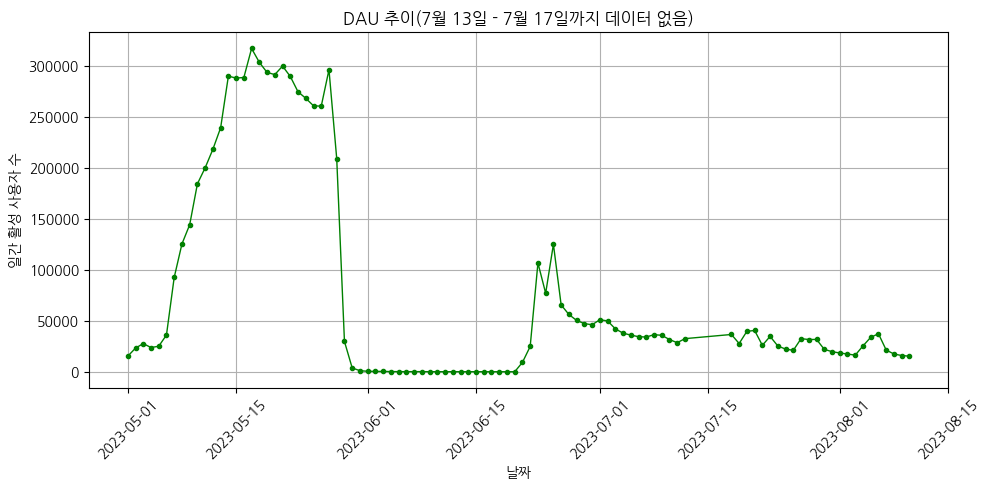

In [31]:
# 날짜 형식 변환
total_dau["date"] = pd.to_datetime(total_dau["date"])

# 시계열 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(
    total_dau["date"],
    total_dau["DAU"],
    color='green',       # 선 색상: 초록색
    marker='o',          # 점 모양
    markersize=3,        # 점 크기
    linewidth=1          # 선 두께
)
plt.title("DAU 추이(7월 13일 - 7월 17일까지 데이터 없음)")
plt.xlabel("날짜")
plt.ylabel("일간 활성 사용자 수")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

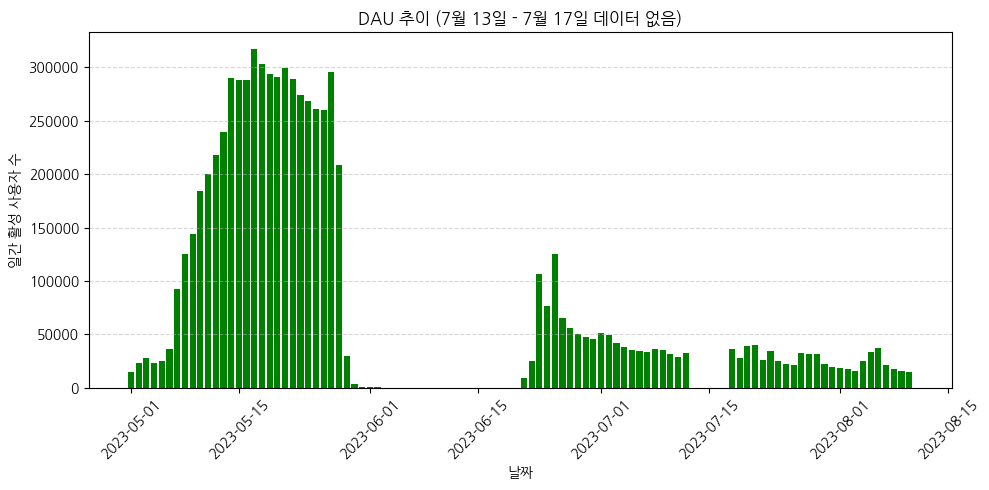

In [32]:
# 날짜 형식 변환
total_dau["date"] = pd.to_datetime(total_dau["date"])

# 막대그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(
    total_dau["date"],
    total_dau["DAU"],
    color='green'
)
plt.title("DAU 추이 (7월 13일 - 7월 17일 데이터 없음)")
plt.xlabel("날짜")
plt.ylabel("일간 활성 사용자 수")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # y축 눈금선만
plt.tight_layout()
plt.show()

In [33]:
dau.head(60)

,date,DAU
0,2023-05-01,15242
1,2023-05-02,23176
2,2023-05-03,27625
3,2023-05-04,23758
4,2023-05-05,25006
5,2023-05-06,36028
6,2023-05-07,92481
7,2023-05-08,125260
8,2023-05-09,144107
9,2023-05-10,184233


6월에 갑자기 줄어드는 상황을 뭐라고 설명해야하지?

# WAU

In [2]:
import pandas as pd

# 경로 설정
file_path = "gs://codeit-project/hackle/merged_df_final.parquet"
key_path = "/home/leesh/codeit_project/codeit-project-docker/config/key.json"

# GCS에서 parquet 불러오기
df = pd.read_parquet(file_path, storage_options={"token": key_path})

# 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 55770129 entries, 0 to 2878667
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   device_id       object        
 2   event_key       object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ GB
None


In [3]:
# 경로 설정
file_path = "gs://codeit-project/hackle/final.parquet"
key_path = "/home/leesh/codeit_project/codeit-project-docker/config/key.json"

# GCS에서 parquet 불러오기
hackle_events = pd.read_parquet(file_path, storage_options={"token": key_path})

# 확인
print(hackle_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11406944 entries, 0 to 11406943
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   friend_count    float64       
 5   question_id     float64       
 6   heart_balance   float64       
 7   id              int64         
 8   user_id         object        
 9   device_id       object        
 10  osname          object        
 11  osversion       object        
dtypes: datetime64[ms](1), float64(3), int64(1), object(7)
memory usage: 1.0+ GB
None


In [4]:
display(df.head())
display(hackle_events.head())

,event_datetime,device_id,event_key
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae,button
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796,button
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff,button
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a,button
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c,button


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


In [5]:
df = df.drop(columns=['event_key'])
df.head()

,event_datetime,device_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c


In [6]:
df = df.rename(columns={'device_id':'user_id'})

In [7]:
df.head()

,event_datetime,user_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c


In [8]:
display(df.head())
display(hackle_events.head())

,event_datetime,user_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


In [9]:
print(df.columns)
print(hackle_events.columns)

print(df.dtypes)
print(hackle_events.dtypes)

print(df.shape)
print(hackle_events.shape)

Index(['event_datetime', 'user_id'], dtype='object')
Index(['event_id', 'event_datetime', 'event_key', 'session_id', 'friend_count',
       'question_id', 'heart_balance', 'id', 'user_id', 'device_id', 'osname',
       'osversion'],
      dtype='object')
event_datetime    datetime64[ns]
user_id                   object
dtype: object
event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
friend_count             float64
question_id              float64
heart_balance            float64
id                         int64
user_id                   object
device_id                 object
osname                    object
osversion                 object
dtype: object
(55770129, 2)
(11406944, 12)


In [10]:
df['user_id'] = df['user_id'].astype(str)
hackle_events['user_id'] = hackle_events['user_id'].astype(str)

# ✅ 두 데이터프레임 모두 datetime64[ns]로 변환
df["event_datetime"] = pd.to_datetime(df["event_datetime"]).astype('datetime64[ns]')
hackle_events["event_datetime"] = pd.to_datetime(hackle_events["event_datetime"]).astype('datetime64[ns]')

# ✅ 컬럼 순서 맞추고, 인덱스 초기화
df = df[["event_datetime", "user_id"]].reset_index(drop=True)
hackle_events = hackle_events[["event_datetime", "user_id"]].reset_index(drop=True)

# ✅ concat 실행
total = pd.concat([df, hackle_events], ignore_index=True)

In [11]:
print(df["event_datetime"].dtype)           # ✅ datetime64[ns]
print(hackle_events["event_datetime"].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
total = pd.concat([df, hackle_events], ignore_index=True)
#total.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/total.parquet", engine="pyarrow", compression="snappy")

In [13]:
total.head()

,event_datetime,user_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c


In [2]:
total = pd.read_parquet('/home/leesh/codeit_project/codeit-project-docker/parquet/total.parquet')

In [3]:
total.head()

,event_datetime,user_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c


In [14]:
total.shape

(67177073, 2)

In [5]:
total.head(30)

,event_datetime,user_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c
5,2023-05-01 09:00:00,3c45d794-0474-4146-adf2-b7cd6bd4a3dc
6,2023-05-01 09:00:00,49c79d7b-8940-4ba5-81a1-f06464cce8fa
7,2023-05-01 09:00:00,af7f7ae3-9a04-408f-b84a-0c82d195958b
8,2023-05-01 09:00:00,e50bf869-27b1-435c-81f4-4ac563a7a2fb
9,2023-05-01 09:00:00,06e742a4-b9c7-410c-8c6b-42e97b0c80f5


In [15]:
# 날짜 파싱 + 주차 추출
total["week"] = pd.to_datetime(total["event_datetime"]).dt.to_period("W").astype(str)

# 주차별 고유 session_id 수 (WAU)
weekly_wau = total.drop_duplicates(subset=["week", "user_id"]) \
                  .groupby("week")["user_id"] \
                  .nunique() \
                  .reset_index(name="WAU")

In [16]:
weekly_wau.tail(60)

,week,WAU
0,2023-05-01/2023-05-07,120261
1,2023-05-08/2023-05-14,470805
2,2023-05-15/2023-05-21,546926
3,2023-05-22/2023-05-28,530601
4,2023-05-29/2023-06-04,34456
5,2023-06-05/2023-06-11,586
6,2023-06-12/2023-06-18,231
7,2023-06-19/2023-06-25,217128
8,2023-06-26/2023-07-02,186896
9,2023-07-03/2023-07-09,145293


In [17]:
weekly_wau.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/total_wau.parquet", engine="pyarrow", compression="snappy")

## 시각화

In [46]:
weekly_wau = pd.read_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/total_wau.parquet")

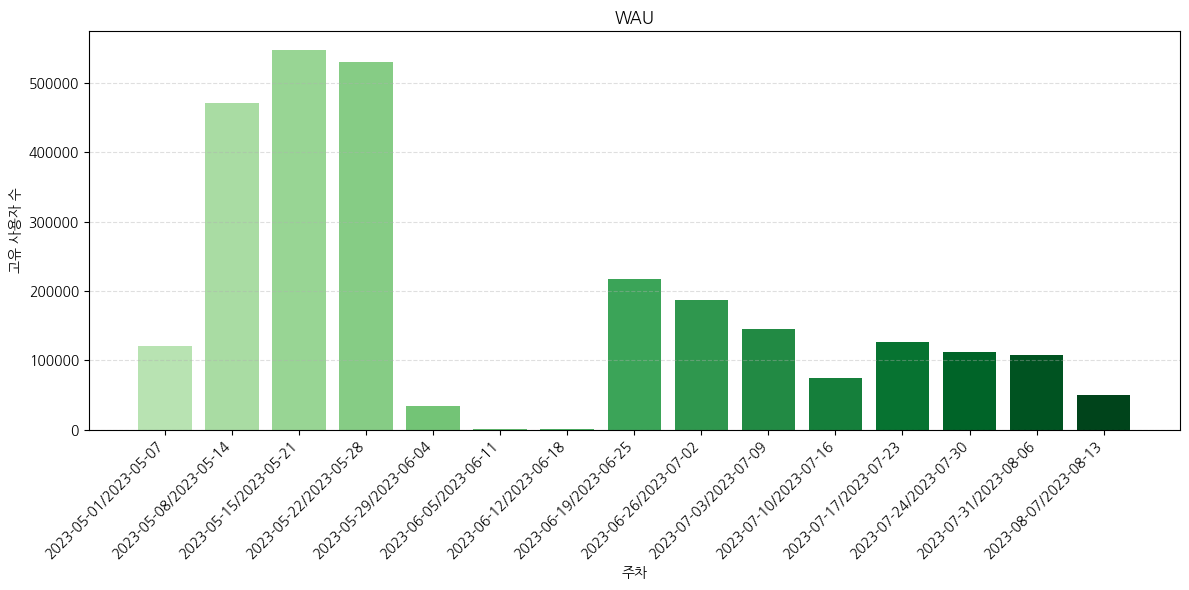

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 깨짐 방지
import matplotlib.cm as cm
import numpy as np

df = weekly_wau.copy()

# 2. X축 순서 기반 색상 인덱스 생성
n = len(df)
colors = cm.Greens(np.linspace(0.3, 1, n))  # 밝은 초록(0.3) → 진한 초록(1.0) 사이

# 3. 그래프
plt.figure(figsize=(12, 6))
plt.bar(df["week"], df["WAU"], color=colors)
plt.title("WAU")
plt.xlabel("주차")
plt.ylabel("고유 사용자 수")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [19]:
weekly_wau.head()

,week,WAU
0,2023-05-01/2023-05-07,120261
1,2023-05-08/2023-05-14,470805
2,2023-05-15/2023-05-21,546926
3,2023-05-22/2023-05-28,530601
4,2023-05-29/2023-06-04,34456


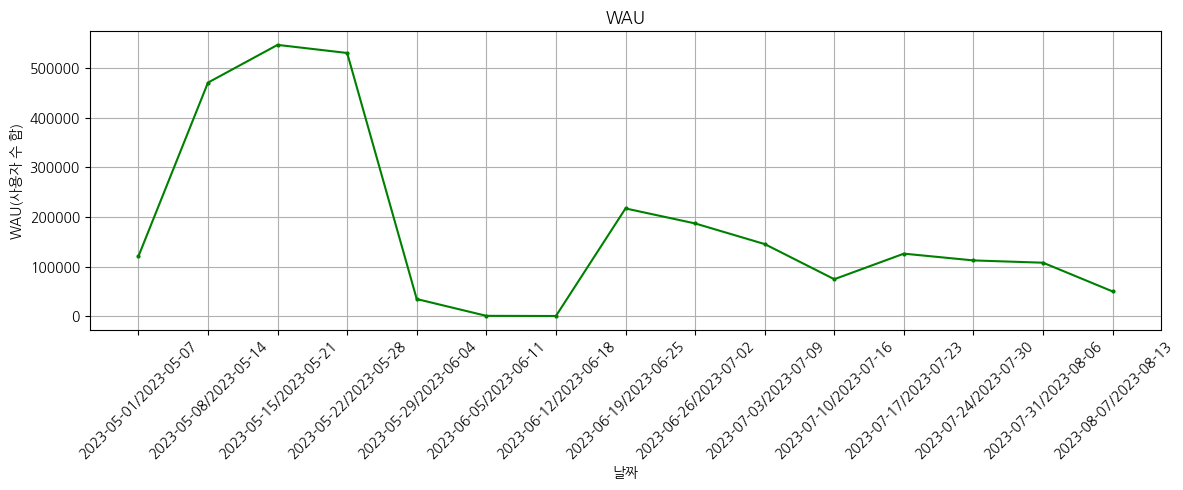

In [20]:
df = weekly_wau.copy()



# ✅ 2. 인덱스를 날짜로 설정
df = df.set_index("week")


# ✅ 4. 시각화
plt.figure(figsize=(12, 5))
plt.plot(df.index, df.values, color='green', marker='o', markersize=2)
plt.title("WAU")
plt.xlabel("날짜")
plt.ylabel("WAU(사용자 수 합)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rolling WAU 

In [22]:
dau = pd.read_parquet('/home/leesh/codeit_project/codeit-project-docker/parquet/dau.parquet')
dau2 = pd.read_parquet('/home/leesh/codeit_project/codeit-project-docker/parquet/dau2.parquet')
total_dau = pd.read_parquet('/home/leesh/codeit_project/codeit-project-docker/parquet/total_dau.parquet')

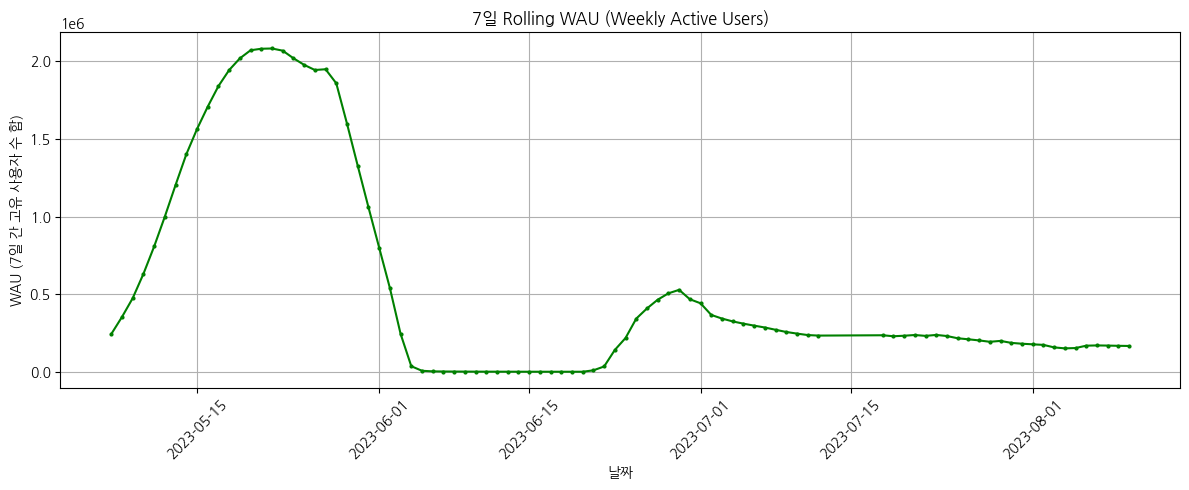

In [23]:
# ✅ 1. 날짜를 datetime으로 변환 (이미 되어 있으면 생략 가능)
total_dau["date"] = pd.to_datetime(total_dau["date"])

# ✅ 2. 인덱스를 날짜로 설정
total_dau = total_dau.set_index("date")

# ✅ 3. 7일 rolling sum으로 WAU 계산
wau_rolling = total_dau["DAU"].rolling(window=7).sum().dropna()

# ✅ 4. 시각화
plt.figure(figsize=(12, 5))
plt.plot(wau_rolling.index, wau_rolling.values, color='green', marker='o', markersize=2)
plt.title("7일 Rolling WAU (Weekly Active Users)")
plt.xlabel("날짜")
plt.ylabel("WAU (7일 간 고유 사용자 수 합)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
rolling_wau = wau_rolling.reset_index(name='rolling WAU')

In [25]:
rolling_wau.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/rolling_wau.parquet", engine="pyarrow", compression="snappy")

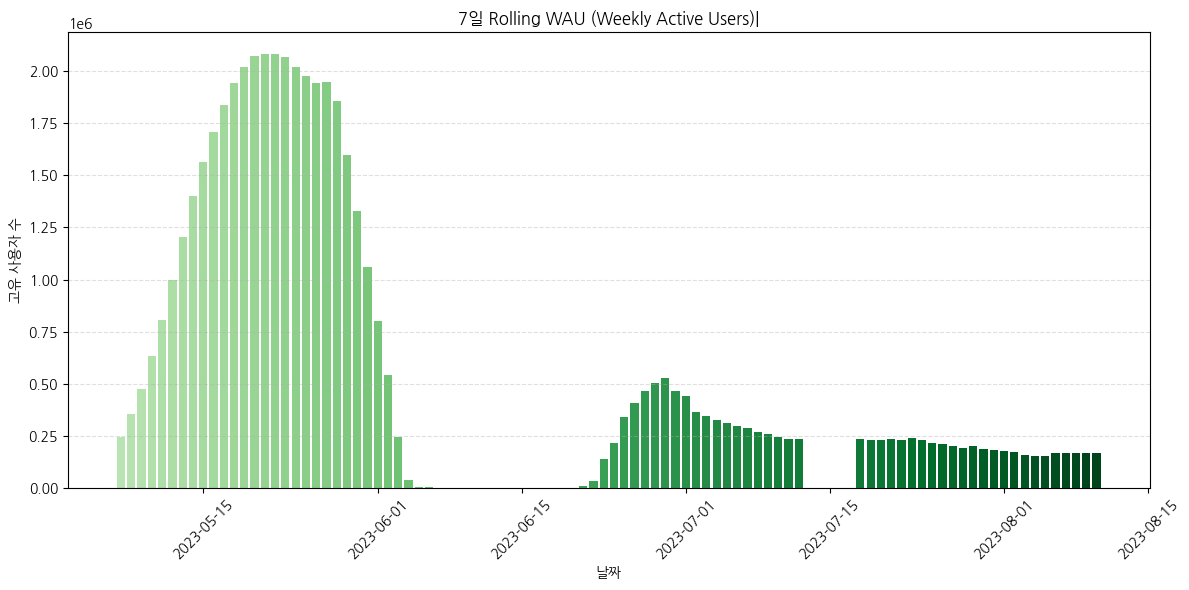

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import koreanize_matplotlib

df = rolling_wau.copy()

# 1. 색상 생성 (순서 기반 밝은 초록 → 진한 초록)
n = len(df)
colors = cm.Greens(np.linspace(0.3, 1.0, n))  # 0.3은 밝은 초록, 1.0은 진한 초록

# 2. 막대그래프
plt.figure(figsize=(12, 6))
plt.bar(df["date"], df["rolling WAU"], color=colors)

# 3. 서식
plt.title("7일 Rolling WAU (Weekly Active Users)|")
plt.xlabel("날짜")
plt.ylabel("고유 사용자 수")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [27]:
rolling_wau.head()

,date,rolling WAU
0,2023-05-07,243316.0
1,2023-05-08,353334.0
2,2023-05-09,474265.0
3,2023-05-10,630873.0
4,2023-05-11,807044.0


# MAU

In [28]:
total = pd.read_parquet('/home/leesh/codeit_project/codeit-project-docker/parquet/total.parquet')

In [29]:
total.head()

,event_datetime,user_id
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c


In [30]:
total['event_datetime'] = pd.to_datetime(total['event_datetime'])

In [31]:
total["month"] = total["event_datetime"].dt.month

In [32]:
total.head()

,event_datetime,user_id,month
0,2023-05-01 09:00:00,cfc34eab-6930-488b-8109-70d37cec7dae,5
1,2023-05-01 09:00:00,0dde2ecb-ff03-440f-98f3-94f20978b796,5
2,2023-05-01 09:00:00,b50774ed-24ce-49e1-9383-945ff3aea9ff,5
3,2023-05-01 09:00:00,0999c6b6-c579-4c0f-916c-9a113010f84a,5
4,2023-05-01 09:00:00,45985493-ed35-4cc5-935f-1bcf922e213c,5


In [33]:
mau = total.groupby('month')['user_id'].nunique().reset_index(name='MAU')

In [34]:
mau.head()

,month,MAU
0,5,900968
1,6,268345
2,7,400756
3,8,122233


In [35]:
mau.to_parquet("/home/leesh/codeit_project/codeit-project-docker/parquet/total_mau.parquet", engine="pyarrow", compression="snappy")

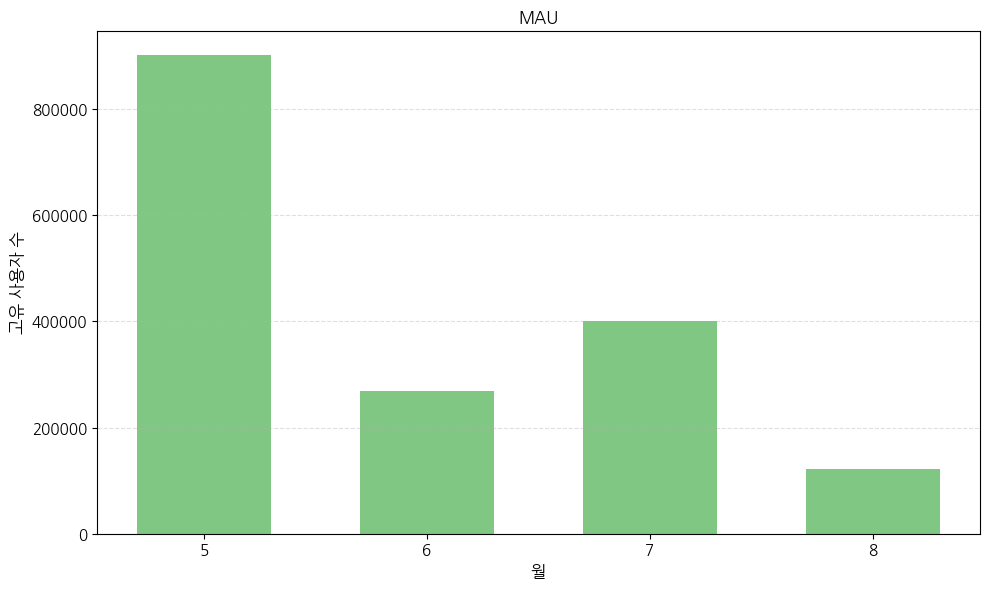

In [36]:
# 그래프 설정
plt.figure(figsize=(10, 6))
bars = plt.bar(
    mau["month"].astype(str),       # 월을 문자열로 변환하여 x축 라벨로
    mau["MAU"],
    color="#81c784",                # 연초록          # 테두리 초록
    width=0.6
)

# 타이틀 및 축 서식
plt.title("MAU")
plt.xlabel("월", fontsize=12)
plt.ylabel("고유 사용자 수", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()